Notebook is copyright &copy; of <a href="https://ajaytech.co"> Ajay Tech </a>

# Naive Bayes Classifier

## Contents

- What is Naive Bayes
- Bayes Theorem & Conditional Probability
- Naive Bayes Theorem
- Example - Classify Fruits based on characteristics
- Example - Classify Messages as Spam or Ham
  - Get dataset
  - EDA
  - Simple data engineering
  - Sparse Matrix format
  - What is a Corpus
  - Training and test datasets
  - Data modeling
  - Verify results
  - Example - Classify Congressman as Democrat or Republican
- Naive Bayes on Continuous variable.

### What is Naive Bayes

Say you get an email like so,

**From** : njlotterries1234@gmail.com <br>
**Subject** : You won Lottery <br>
**Body** : Congratulations !!! You won a lottery of 5 Million dollars. Click here to claim.. <br>





What do you think of this ? Is this a spam e-mail or not ? In all probability this is spam. How do you know it ? Well, you look at the index words - words like "lottery" , "viagra" , "free", "money back". When you see these words, generally you tend to classify that message as spam. This is exactly how Naive Bayes works. Let's formalize our understanding a bit by going a bit deeper.

### Bayes Theorem & Conditional Probability

Before we get into "Naive" Bayes, we have to first understand **Bayes** theorem. To understand Bayes theorem, we have to first understand something called _Conditional Probability_. What exactly is it ?

Say there is a standard deck of cards and you draw a card at random. 



- What is the probability that it is a red card ?

<img src="./pics/probability_red_card.png" style="background:white"/> 

- What is the probability that it is a face card, given that it is a red card ?

<img src="./pics/probability_red_card_face_card.png" style="background:white"/>

This is called conditional probability. Bayes theorem is an alternate way to compute the same thing.

<img src="./pics/bayes_formula.png"/>

Now, let's calculate each one of these probabilities.

- Probability of face card P(A)

<img src="./pics/probability_face_card.png"/>

- Probability of a red card



<img src="./pics/p_red.png"/>

- Probability of a red card , given it is a face card.

<img src="./pics/p_red_face.png"/>

- And finally, we calculate the probability of a face card, given its a red card P ( face | red )

<img src="./pics/p_face_red.png"/>

What did we achieve here ? Looks like we have made things more complicated, right ? I agree with you. In fact, this formula is not all that useful in machine learning. But there is an assumption that makes this formula extraordinarily useful in ML. Let's go back to the email example.



<img src="./pics/p_spam.png"/>

Again, not very useful. To calculate the probability of "You won lottery" is very arbitrary. You cannot calculate the probability of occurrence of all different phrases or combination of words. The next time around / the subject line might say "Congratulations!! You won lottery" -which is slightly different from ' 'You won lottery" . Point being, you cannot possibly Calculate all different combination of words that could result from the use of all different words in the English dictionary. 



### Naive Bayes

This is where the Bayes theorem becomes **Naive** . Let's revisit the formula again.



<img src="./pics/p_spam_revisirt.png"/>

The probability of the word "You" occurring in the email is independent of the Lord ' "Won" occurring. eg.,



- Do you have the paper with **you** ?
- we have won the **contract**

These Sentences are completely independent. When we break down the event into the respective independent events, probability can be Simplified as follows. 


<img src="./pics/p_you_won_lottery.png"/>

This is actually a "Naive" assumption - because in reality, there is some level of overlap. Meaning, when you mention the word "lottery", you almost always use the word "win" or some variant-like ''won'" or "winning" . However, this is where ML is lucky. Even with the naive assumption, results are pretty good with text classification in real life. Let's apply the simplification to the Bayes theorem once again.



<img src="./pics/p_spam_revisit.png"/>

With a bit of naivety, this formula became so much more useful. In fact, it makes it so useful that Naive Bayes is almost exclusively used for most text classification tasks. Let's explore this example with some rough data - just believable, made-up data. 



- Probability of "You won lottery" being spam.

<img src="./pics/data_made_up.png"/>

- Probability of "You won spam" as NOT spam. 

<img src="./pics/you_won_lottery_not_spam.png"/>

So, the probability of this phrase not being spam is 1.51. 



<img src="./pics/p_not_spam_vs_spam.png"/>

Pretty effective, right? Especially given the simplification. Calculating the probability of the individual words is easy. The heart of this algorithm is, given any sentence, this algorithm can break it down into it's components (words) and based on the "spamminess" of each of the words, the entire sentence can be classified as spam or not.



All we are trying to do in Naive Bayes, is to break down a complicated problem into its components. Once the component is classified, essentially the bigger piece is classified as well.




It is like solving a jigsaw puzzle. How do you solve one typically ? You look for smaller puzzles to solve. Say this is a picture of a car - you start to look for smaller components of the car, like a tire, a windshield and solve for each of these separately. Once you got the pieces figured out, all you have to do is to put them in order. Naive Bayes works more or less like this.





<img src="./pics/solve_jigsaw_puzzle.png"/>

### Classify fruits based on Characteristics

Now that we understand the basics of Naive Bayes, let's create a simple dataset and solve it in excel. The purpose behind this exercise is to get familiar with Naive Bayes calculation using a smaller dataset. This is going to solidify our understanding a bit further, before we dive into more complicated examples.



<img src="./pics/fruits_characteristics.png"/>

Solve the fruits dataset in excel

$P_{apple} = 3/9 = 0.333$ <br>
$P_{grape} = 3/9 = 0.333$ <br>
$P_{melon} = 3/9 = 0.333$




The probability of each of the characteristics - round, large, small etc, can be calculated as below.


<img src="./pics/p_round_large.png"/>

Now, let's move on to the individual conditional probabilities. For example, what is the probability that a fruit is round, given that it is an apple ? In all the cases of Apple, the fruit is always round.



<img src="./pics/p_round_apple.png"/>

However, what is the probability that a fruit is red, given that its an apple ? one out of three apples are red.



<img src="./pics/red_apple.png"/>

Like that, we keep calculating the conditional probabilities of all the individual characteristics. Think of this like calculating the probability of each individual word being spam or not.



<img src="./pics/all_3.png"/>

Time to test our data. Let's say, we want to calculate the probability of a fruit being an Apple, if it is round and large. All we have to do is plug the numbers.



<img src="./pics/p_apple_round_large.png"/>

What is the probability that a fruit is an apple, if it is round, large and smooth ?



<img src="./pics/p_apple_round_large_smooth.png"/>

Based on our little dataset, we are not doing too bad. let's do the opposite now. What is the probability of a fruit being a grape, given that it is round, large and smooth ?



<img src="./pics/p_grape_round_large_smooth_green.png"/>

Makes sense, right ? grape is never "large". Hence the probability of a fruit being a grape if it is "large" is relatively small - 16 %.



#### Solve the fruits dataset in Python

In [6]:
import pandas as pd

fruits = pd.read_csv("../data/fruits.csv" , delimiter=',' )

In [20]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(fruits_numeric.iloc[:,1:11], fruits_numeric["fruit"])  


In [22]:
y_predict = model.predict(fruits_numeric.iloc[:,1:11])
y_predict

array(['apple', 'apple', 'apple', 'grape', 'grape', 'grape', 'apple',
       'melon', 'melon'], dtype='<U5')

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(fruits_numeric["fruit"], y_predict))  
print(accuracy_score(fruits_numeric["fruit"], y_predict))

[[3 0 0]
 [0 3 0]
 [1 0 2]]
0.8888888888888888


In [16]:
fruits.iloc[:,1:11]

,round,large,small,red,green,black,golden,yellow,smooth,rough
0,yes,yes,no,yes,no,no,no,no,yes,no
1,yes,yes,no,no,yes,no,no,no,yes,no
2,yes,yes,no,no,no,no,yes,no,yes,no
3,yes,no,yes,yes,no,no,no,no,yes,no
4,yes,no,yes,no,yes,no,no,no,yes,no
5,yes,no,yes,no,no,yes,no,no,yes,no
6,yes,yes,no,no,yes,no,no,no,yes,no
7,yes,yes,no,no,no,no,yes,no,no,yes
8,yes,yes,no,no,no,no,no,yes,no,yes


In [18]:
mapping = { "yes": 1, "no" : 0}

fruits_numeric = fruits.replace(mapping)

In [19]:
fruits_numeric

,fruit,round,large,small,red,green,black,golden,yellow,smooth,rough
0,apple,1,1,0,1,0,0,0,0,1,0
1,apple,1,1,0,0,1,0,0,0,1,0
2,apple,1,1,0,0,0,0,1,0,1,0
3,grape,1,0,1,1,0,0,0,0,1,0
4,grape,1,0,1,0,1,0,0,0,1,0
5,grape,1,0,1,0,0,1,0,0,1,0
6,melon,1,1,0,0,1,0,0,0,1,0
7,melon,1,1,0,0,0,0,1,0,0,1
8,melon,1,1,0,0,0,0,0,1,0,1


We are not very far off, given our dataset is pretty small. The one place where we went wrong is in classify a melon wrongly as an apple. If we compared the predictions vs the actuals, we can see that we went wrong with the 7th entry ( a melon being mis-classified as an apple )

In [40]:
data = {"predict":y_predict,"actual":fruits_numeric["fruit"]}
pd.DataFrame(data)

,predict,actual
0,apple,apple
1,apple,apple
2,apple,apple
3,grape,grape
4,grape,grape
5,grape,grape
6,apple,melon
7,melon,melon
8,melon,melon


Let's check out the actual entry.



<img src="./pics/entries_comparision.png"/>

As you can see, the entry for melon ( watermelon ) coincides in its data points to the green apple. How could this happen ? This is because of an oversimplification with regards to size. We only have 2 sizes - small and large. However, both the apple and water melon are large ( and round and smooth ). And that's why the NB algorithm got it wrong. If we had an extra size characteristic ( say XL ), that would have solved this problem.



### Classify messages as Spam

Now that we understood the basics of Naive Bayes along with a simple example in excel and Python, we can proceed to solve the problem that we started with - To classify a message as spam or not.

**Step 1** - Get the dataset <br>
There is a simple SMS ( text message ) dataset available at <a href="https://www.kaggle.com/uciml/sms-spam-collection-dataset">kaggle</a> or at the <a href="https://archive.ics.uci.edu/ml/datasets/sms+spam+collection">UCI ML datesets</a>. You can also download the file from <a href="https://github.com/ajaytech002/DataScience_Python/blob/master/week_3_ml_algorithms/data/spam.csv">Ajay Tech's github page</a>.  Download the zip file and open it in excel as a tab delimited format. Each of these messages have been classified as either spam or ham ( ham is just a technical word for "non-spam" ). Open the dataset in excel as a tab-delimited format and give column names ( if not available already ).



**Step 2** - Read the dataset into Python

In [2]:
import pandas as pd

data = pd.read_csv("../data/spam.csv", encoding='ISO-8859-1')

In [47]:
data.head()

,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data = data.iloc[:,[0,1]]

In [50]:
data.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Step 3** - Simple EDA

- How many messages are there in the dataset ?

In [55]:
data.count()

class      5572
message    5572
dtype: int64

- Out of them, count the occurances of spam vs ham(non-spam)

In [68]:
data.groupby("class").nunique()

,class,message
class,,
ham,1,4516
spam,1,654


- What percentage of this is spam ?

In [71]:
data.groupby("class").nunique().iloc[1,1]/data.groupby("class").nunique().iloc[0,1]

0.14481842338352524

14 % of the messages are spam. 

**Step 4** - Feature Engineering

Just like we converted the fruits dataset's feature values from "yes" or "no" to a 1 or 0 , Naive Bayes (or for that matter most ML algorithms) need the feature data to be numeric in nature. In order to do it, we have to use some techniques from Natural language processing. 

- Tokenize the message (into words) and create a sparse matrix

This process basically splits the sentence (message) to it's individual words. Let's see a sample before we tokenize the entire dataset. 

<img src="./pics/sparse-matrix-example.png"/>

In [5]:
messages = ["Hi there", "Hi, how are you","Hello"]

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer    = CountVectorizer()
sparse_matrix = vectorizer.fit_transform(messages)

In [7]:
vectorizer.get_feature_names()

['are', 'hello', 'hi', 'how', 'there', 'you']

In [8]:
sparse_matrix.toarray()

array([[0, 0, 1, 0, 1, 0],
       [1, 0, 1, 1, 0, 1],
       [0, 1, 0, 0, 0, 0]], dtype=int64)

Now, let's do the same on our real messages dataset.

In [9]:
sparse_matrix = vectorizer.fit_transform(data["message"])

In [10]:
len(vectorizer.get_feature_names())

8644

That's 8600+ unique words and the size of the sparse matrix is 5572 rows by 8644 columns. 

In [11]:
sparse_matrix.toarray().shape

(5572, 8644)

There is scope for a ton of optimization here like
- convert all characters to lower case
- remove punctuation
- remove stop words 
etc <br>

But that is a subject for another day. Here we will just focus on learning the Naive Bayes algorithm.

**Step 5** - Train/Test data split

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sparse_matrix , data['class'], test_size=0.2)  


**Step 6** - Model the data

In [13]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)  

**Step 7** - Evaluate the model

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score


y_predict = model.predict(X_test)

print ( confusion_matrix(y_test, y_predict) )
print ( accuracy_score(y_test,y_predict))


[[946  12]
 [  6 151]]
0.9838565022421525


Sometimes, reading the confusion matrix can be a bit tricky since it does not have any labels. Pandas has a nice method for this called **crosstab**. It shows the labels nicely, thus making the same confusion matrix much more readable. 

In [28]:
import pandas as pd

pd.crosstab(y_test, y_predict,rownames=['Actual'], colnames=['Predicted'],  margins=True)

Predicted,ham,spam,All
Actual,,,
ham,946,12,958
spam,6,151,157
All,952,163,1115


That's a 98 % accuracy score. Pretty rare and probably resulted from the particular train/test split. But overall, it is not uncommon to attain close to 90% accuracy with Naive Bayes particularly in the text processing domain.

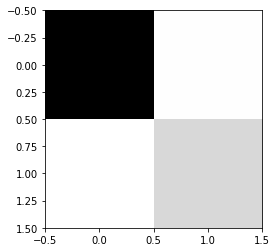

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

confusion_matrix = confusion_matrix(y_test, y_predict)
plt.imshow(confusion_matrix, cmap='binary', interpolation='None')
plt.show()

### Challenge

Let's solve another problem in Naive Bayes. Load up a dataset called house-votes-84.csv from the data folder. The data set should look like this.

<img src="./pics/house-votes-snapshot.png"/>

These are the results from Congressmen in the US, voting a Yes ( for ) or No (Against ) on 16 different issues. Instead of putting names, the class column identifies the congressmen as either a Republican or a Democrat.

**Task** - Identify the congressmen as either a Democrat or Republican based on his voting pattern.

**solution** - This problem is almost exactly similar to the fruits data we started with at the beginning of leaning Naive Bayes.

In [105]:
# 1. Import the dataset
import pandas as pd

data = pd.read_csv("../data/house-votes-84.csv")

# 2. Remove all rows with NaN values ( or replace them )

data = data.dropna()

# 3. convert the text (Y or N) to numerics. 
mapping = { "y": 1, "n" : 0}
data_x = data.iloc[:,1:17].replace(mapping)

data_y = data["class"]

# 4. split the data into train/test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_x , data_y, test_size=0.2)  

# 5. Model the data using Naive Bayes
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)  

# 6. Predict data
y_predict = model.predict(X_test)

# 7. Create a confusion matrix to check accuracy
print ( pd.crosstab(y_test, y_predict,rownames=['Actual'], colnames=['Predicted'],  margins=True) )

# 8. Print the accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score

print ( confusion_matrix(y_test, y_predict) )
print ( accuracy_score(y_test,y_predict))

Predicted   democrat  republican  All
Actual                               
democrat          22           3   25
republican         0          22   22
All               22          25   47
[[22  3]
 [ 0 22]]
0.9361702127659575


### Naive Bayes on continuous variables


So far, we have seen Naive Bayes work on factor variables. Does NB ever work on continous variables ? Yes, it does - ofcourse with discretized version of those variables ( Think of binning a normal distribution ). The key assumption there would be that the variable has a normal distribution. For example, think of the iris dataset - is the "Sepal length" of setosa species normally distributed ? Let's find out.



In [79]:
from sklearn import datasets

iris = datasets.load_iris()

iris_data    = iris.data
iris_target  = iris.target

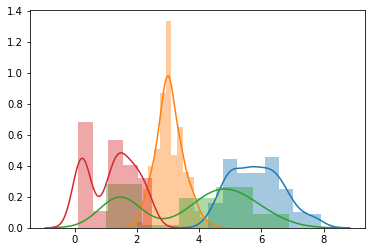

In [92]:
# matplotlib does not have the ability to plot the kernel density function
import matplotlib.pyplot as plt
# So, we are using seaborn instead
import seaborn as sns
%matplotlib inline

# You can check from these curves that Sepal data is normally distributed, but
# the petal data is not. Try them on one by one.

sns.distplot(iris_data[:,0], hist=True, kde=True)
sns.distplot(iris_data[:,1], hist=True, kde=True)
sns.distplot(iris_data[:,2], hist=True, kde=True)
sns.distplot(iris_data[:,3], hist=True, kde=True)

Only the Sepal data is normally distributed. Ideally, we should just be using the sepal data ( Sepal Length and Sepal Width ). However, let's just use all of these and see what happens. As an exercise, try using just the sepal data and check for the accuracy. 

In [107]:
# 1. train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_data , iris_target, test_size=0.2)  

# 2. Naive Bayes modeling
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)  

# 3. Predict data
y_predict = model.predict(X_test)

# 4. Create a confusion matrix to check accuracy
print ( pd.crosstab(y_test, y_predict,rownames=['Actual'], colnames=['Predicted'],  margins=True) )

# 5. Print the accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score

print ( confusion_matrix(y_test, y_predict) )
print ( accuracy_score(y_test,y_predict))


Predicted  0   1   2  All
Actual                   
0          6   0   0    6
1          0  11   1   12
2          0   1  11   12
All        6  12  12   30
[[ 6  0  0]
 [ 0 11  1]
 [ 0  1 11]]
0.9333333333333333


That's pretty accurate as well , isn't it ? In fact even though one of the assumptions (all the variables should be independent of each other ) is wrong, Naive Bayes still outperforms some other classification algorithms.

- The priors ( Probability of a "Setosa" occuring or a "Virginica" occuring .. ) is 0.33 ( a third ) - which we know.
- How about the conditional probabilities ? This is where it gets tricky for continuous variables. You cannot have conditional probabilities for each of the values ( as the number can get infinite ). So, in case of a normal distribution, an approximation is applied based on the following formula.

<img src="./pics/conditional_probability.png"/>

where μ is the mean and σ is the variance